In [34]:
import pandas as pd
import numpy.matlib as np
import os

In [35]:
rootdir = 'c:\\Users\leey2\Amazon_Reviews'
all_reviews = []

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        df = pd.read_csv(os.path.join(subdir,file))
        df["Product"] = np.repmat(file,df.shape[0],1)
        all_reviews.append(df)
        print(df.head())
all_reviews_df = pd.concat(all_reviews)

                                      title  \
0               It is great for me overall!   
1               Easy straws for the elderly   
2                              4-5 time use   
3  You have to push the straw in very hard!   
4                          Difficult to use   

                                              review                star  \
0  Really good for me, with difficulty swallowing...  5.0 out of 5 stars   
1  It doesn’t work for me I have no suction my th...  1.0 out of 5 stars   
2                           They don’t last too long  3.0 out of 5 stars   
3  It helped my sister drink water again after ha...  5.0 out of 5 stars   
4                                  Difficult to use.  2.0 out of 5 stars   

               Product  
0  soupbionixthick.csv  
1  soupbionixthick.csv  
2  soupbionixthick.csv  
3  soupbionixthick.csv  
4  soupbionixthick.csv  
                                               title  \
0                   Mostly retired rehab nurse here.  

In [36]:
all_reviews_df

,title,review,star,Product
0,It is great for me overall!,"Really good for me, with difficulty swallowing...",5.0 out of 5 stars,soupbionixthick.csv
1,Easy straws for the elderly,It doesn’t work for me I have no suction my th...,1.0 out of 5 stars,soupbionixthick.csv
2,4-5 time use,They don’t last too long,3.0 out of 5 stars,soupbionixthick.csv
3,You have to push the straw in very hard!,It helped my sister drink water again after ha...,5.0 out of 5 stars,soupbionixthick.csv
4,Difficult to use,Difficult to use.,2.0 out of 5 stars,soupbionixthick.csv
...,...,...,...,...
121,Great spill-proof product!!,My dad used these cups when he was in an ortho...,5.0 out of 5 stars,soupsp.csv
122,Five Stars,Very helpful for my Mom,5.0 out of 5 stars,soupsp.csv
123,works great,I bought this cup for my father who is bedridd...,5.0 out of 5 stars,soupsp.csv
124,Great cup for elderly and surgery recovery!,Works as advertised. Very helpful following m...,5.0 out of 5 stars,soupsp.csv


In [37]:
list_of_products = all_reviews_df.Product.unique()

In [38]:
list_of_products

array(['soupbionixthick.csv', 'soupbionixthin.csv', 'soupikinsman.csv',
       'soupindependenceplastic.csv', 'soupirije.csv',
       'soupiweightedbase.csv', 'soupkirimon.csv', 'soupprovale.csv',
       'soupsafestrawthick.csv', 'soupsafestrawthin.csv',
       'soupsammons.csv', 'soupsp.csv'], dtype=object)

In [39]:
from textblob import TextBlob
import matplotlib.pyplot as plt

C:\Users\leey2\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


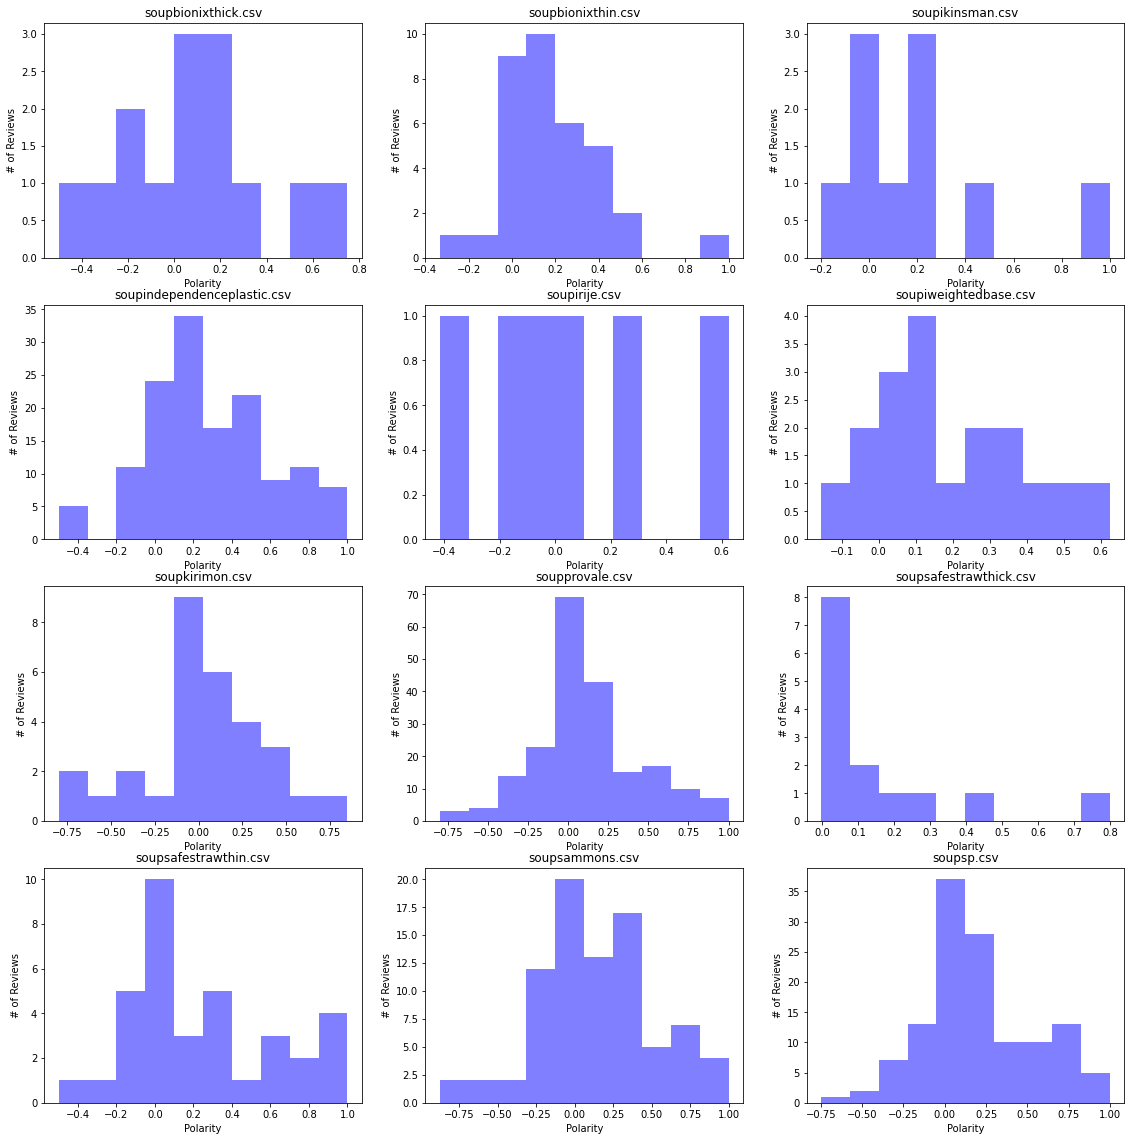

In [40]:
fig = plt.figure(figsize = (15,15), facecolor = None)
c = 1
for product in list_of_products:
    sub_data_frame = all_reviews_df[all_reviews_df["Product"] == product]
#     print(sub_data_frame)
    
    pol = lambda x: TextBlob(x).sentiment.polarity
    sub_data_frame['polarity'] = sub_data_frame['review'].apply(pol)
    
    num_bins = 10
    fig.add_subplot(4, 3, c)
    c = c + 1
    n, bins, patches = plt.hist(sub_data_frame.polarity, num_bins, facecolor='blue', alpha=0.5)
    plt.title(product)
    plt.xlabel('Polarity')
    plt.ylabel('# of Reviews')
    plt.subplots_adjust(left = 0., bottom = 0, right = 1, top = 1, wspace = 0.2, hspace = 0.2)

C:\Users\leey2\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


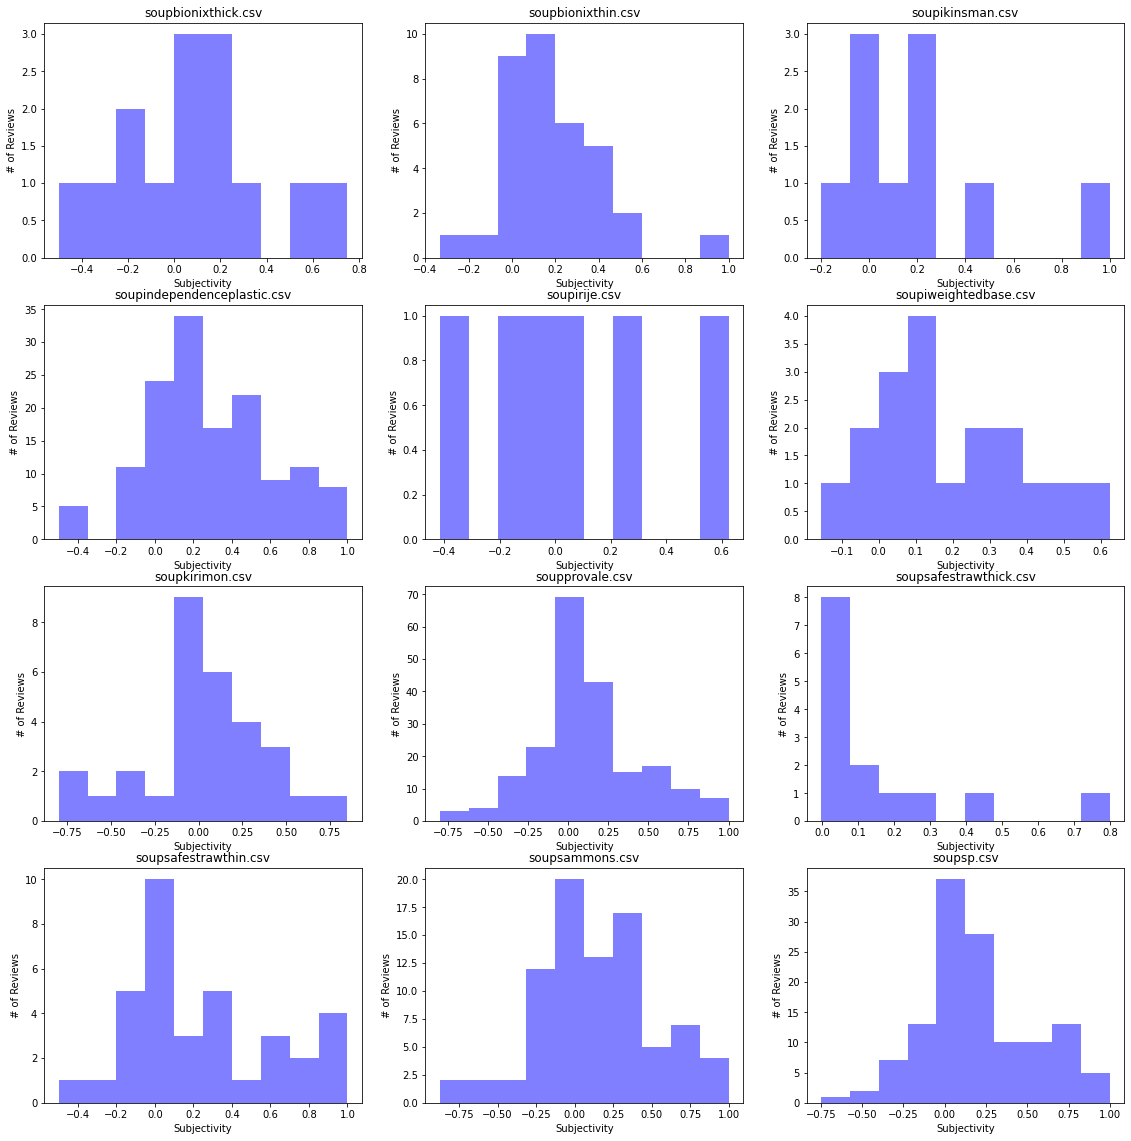

In [41]:
fig = plt.figure(figsize = (15,15), facecolor = None)
c = 1
for product in list_of_products:
    sub_data_frame = all_reviews_df[all_reviews_df["Product"] == product]
#     print(sub_data_frame)
    
    sub = lambda x: TextBlob(x).sentiment.subjectivity
    sub_data_frame['subjectivity'] = sub_data_frame['review'].apply(pol)
    
    num_bins = 10
    fig.add_subplot(4, 3, c)
    c = c + 1
    n, bins, patches = plt.hist(sub_data_frame.subjectivity, num_bins, facecolor='blue', alpha=0.5)
    plt.title(product)
    plt.xlabel('Subjectivity')
    plt.ylabel('# of Reviews')
    plt.subplots_adjust(left = 0., bottom = 0, right = 1, top = 1, wspace = 0.2, hspace = 0.2)

In [42]:
from wordcloud import WordCloud, STOPWORDS

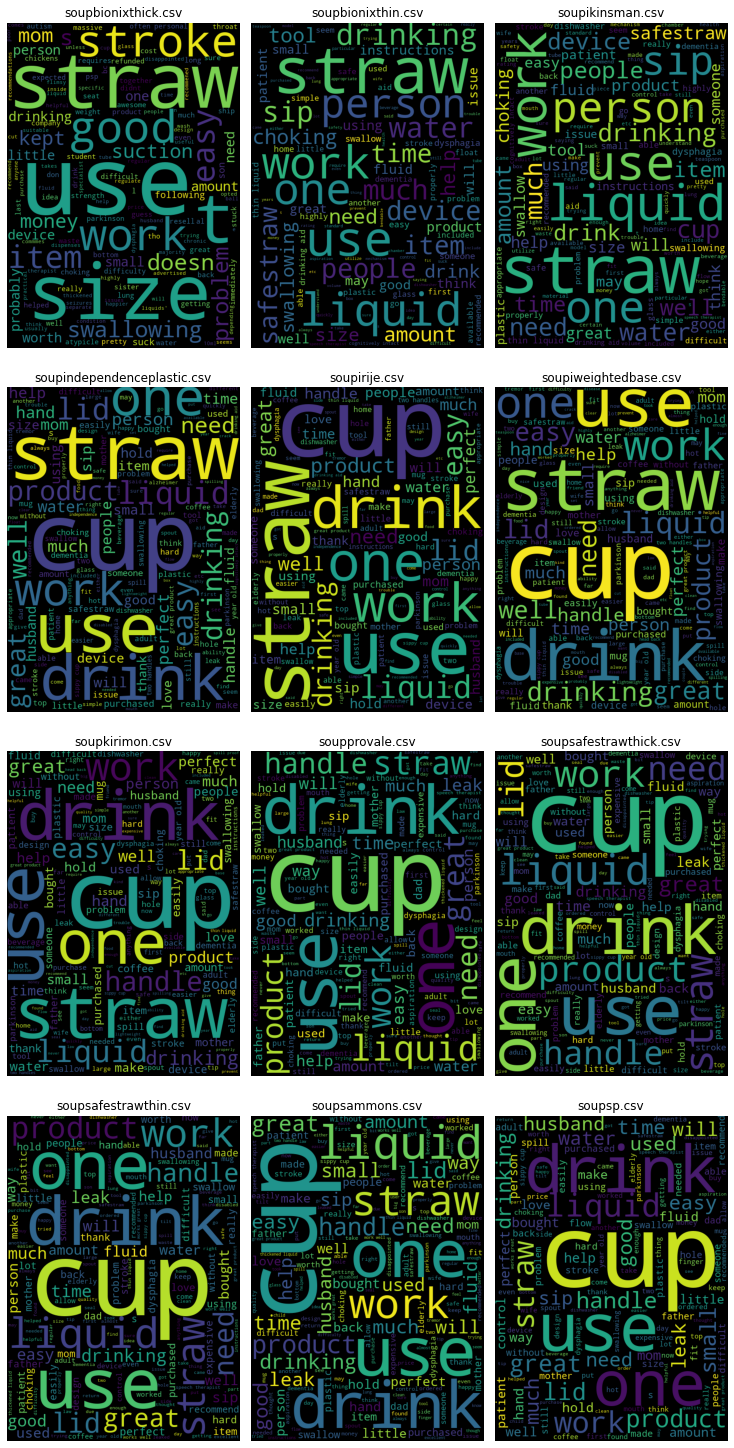

In [43]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,20), facecolor = None)
c = 1
stop_words = set(STOPWORDS)
comment_words = ""
for product in list_of_products:
    sub_data_frame = all_reviews_df[all_reviews_df["Product"] == product]
    
    for i in sub_data_frame.review: 
        i = str(i) 
        separate = i.split() 
        for j in range(len(separate)): 
            separate[j] = separate[j].lower() 
      
        comment_words += " ".join(separate)+" "
    final_wordcloud = WordCloud(width = 500, height = 700, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 8).generate(comment_words)

    fig.add_subplot(4, 3, c)
    c = c + 1
    plt.imshow(final_wordcloud) 
    plt.axis("off") 
    plt.title(product)
    plt.subplots_adjust(left = 0., bottom = 0, right = 0.5, top = 1, wspace = 0.05, hspace = 0.05)
    plt.show

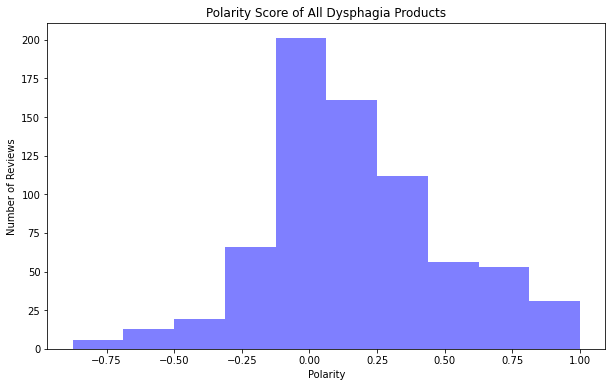

In [44]:
#Creates Polarity Instagram 

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


all_reviews_df['polarity'] = all_reviews_df['review'].apply(pol)
all_reviews_df['subjectivity'] = all_reviews_df['review'].apply(sub)


num_bins = 10
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(all_reviews_df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Polarity Score of All Dysphagia Products')
plt.show();


C:\Users\leey2\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Subjectivity Score of All Dysphagia Products')

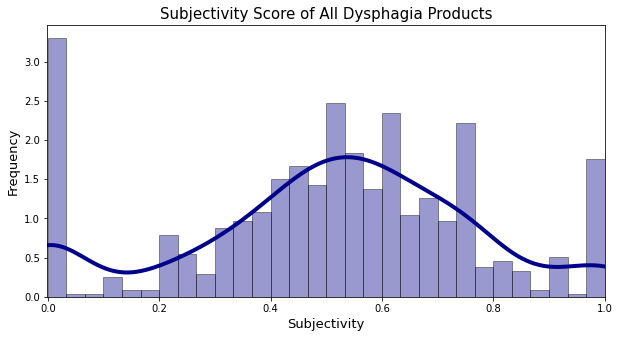

In [45]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.distplot(all_reviews_df['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Subjectivity Score of All Dysphagia Products', fontsize=15)

Word Cloud for All Dysphagia Products


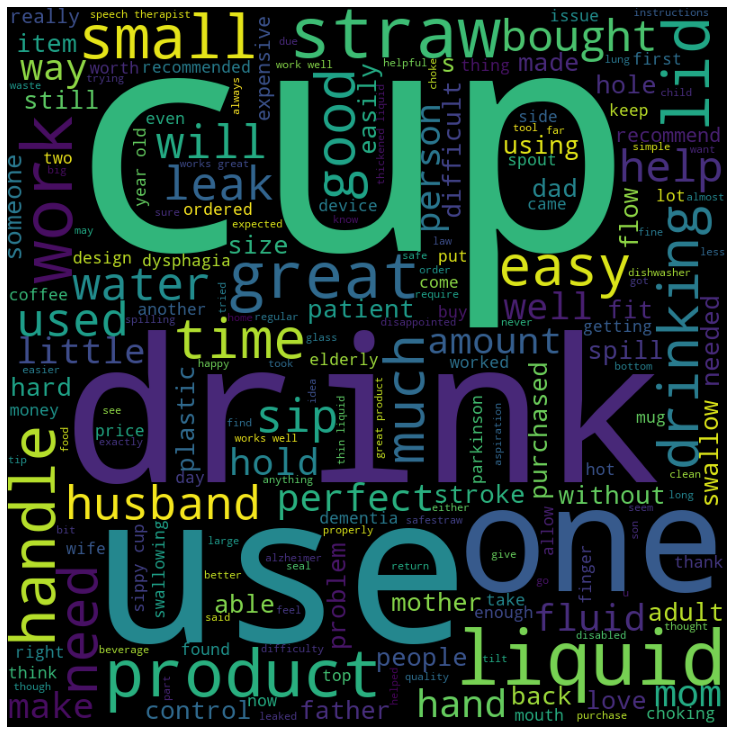

In [46]:
#Creates a WordCloud out of all the reviews 

stop_words = set(STOPWORDS)
comment_words = ""
for i in all_reviews_df.review: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+" "
final_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
print("Word Cloud for All Dysphagia Products")
  
plt.show()

In [47]:
df1 = all_reviews_df[["Product", "review"]]
df1

,Product,review
0,soupbionixthick.csv,"Really good for me, with difficulty swallowing..."
1,soupbionixthick.csv,It doesn’t work for me I have no suction my th...
2,soupbionixthick.csv,They don’t last too long
3,soupbionixthick.csv,It helped my sister drink water again after ha...
4,soupbionixthick.csv,Difficult to use.
...,...,...
121,soupsp.csv,My dad used these cups when he was in an ortho...
122,soupsp.csv,Very helpful for my Mom
123,soupsp.csv,I bought this cup for my father who is bedridd...
124,soupsp.csv,Works as advertised. Very helpful following m...


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [49]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df["review"])

In [50]:
X

<126x793 sparse matrix of type '<class 'numpy.float64'>'
	with 1685 stored elements in Compressed Sparse Row format>

In [62]:
inertia=[]
for k in range(2,126):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=25).fit(X)
    inertia.append(kmeans.inertia_)

C:\Users\leey2\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (122) found smaller than n_clusters (123). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\leey2\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (122) found smaller than n_clusters (124). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\leey2\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (122) found smaller than n_clusters (125). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until


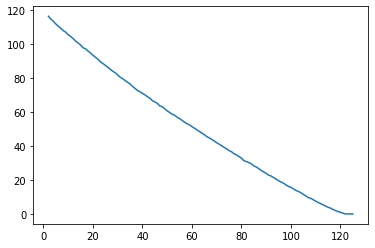

In [72]:
plt.plot(range (2,126),inertia)

In [68]:
test_k = 5
kmeans = KMeans(n_clusters=test_k, random_state=0,n_init=25).fit(X)
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(test_k):
    print("Cluster")
    print(i)
    for ind in order_centroids[i, :10]:
        print(terms[ind])

Cluster
0
perfect
works
daughter
used
tried
product
loves
happy
ok
cheap
Cluster
1
great
works
cup
dementia
worked
price
granddaughter
spill
loved
disables
Cluster
2
good
elderly
mother
plastic
didn
law
handy
rest
thing
bed
Cluster
3
cup
small
mom
lid
adult
doesn
liquids
dad
use
needed
Cluster
4
flow
hole
finger
control
drink
liquid
does
spilling
cup
able


In [64]:
for i in X:
    print(vectorizer.inverse_transform(i))
    print(kmeans.predict(i))

[array(['marked', 'noticed', 'discolored', 'just', 'taste', 'smell',
       'residual', 'product', 'true', 'inside', 'stain', 'slightly',
       'does', 'tomato', 'negative', 'time', 'recovery', 'impressed',
       'told', 'eating', 'asked', 'surgeon', 'plastic', 'pour', 'cup',
       'measuring', 'glass', 'soup', 'heat', 'microwave', 'don', 'shelf',
       'dw', 'hand', 'wash', 'easy', 'sitting', 'use', 'laying', 'used',
       'says', 'description', 'finding', 'eat', 'able', 'weight',
       'losing', 'rapidly', 'solution', 'perfect', 'surgery',
       'reconstruction', 'facial', 'waiting', 'chew', 'unable', 'foods',
       'similar', 'soups', 'creamed', 'smoothies', 'drinking', 'great',
       'work', 'cups', 'total', 'ordered', 've'], dtype='<U14')]
[2]
[array(['drink', 'reclined', 'flexy', 'straw', 'flexible', 'uses', 'grip',
       'good', 'worked', 'size', 'tiny', 'small', 'hands', 'doesn',
       'parkinson', 'like', 'stiffness', 'control', 'motor', 'includes',
       'alzheime